In [1]:
using Plots

In [52]:

using LinearAlgebra

X = [0; 1; 2; 3; 4; 5; 6; 7]
Y = [4.0; 3.1; 2.8; 2.5; 2.3; 2.2; 2.1; 2.0]

function cbf(n,k,t)
  if k == 0
    return 1/sqrt(n)
  else
    return sqrt(2/n)*cos(k*(2t+1)*pi/(2*n))
  end
end    

cbf (generic function with 1 method)

In [53]:

n = 8
C = [cbf(n,i,j) for i=0:(n-1), j=0:(n-1)]
C'* C

8×8 Matrix{Float64}:
  1.0          -1.01507e-16  -3.78598e-17  …   2.00857e-16  -1.70562e-16
 -1.01507e-16   1.0           1.70298e-17     -1.24637e-16   2.518e-17
 -3.78598e-17   1.70298e-17   1.0             -1.83253e-16  -2.79433e-17
 -1.03615e-17  -1.13981e-17  -1.61419e-16      2.02487e-16   2.22263e-18
 -1.33831e-16   1.37841e-16  -2.81922e-17     -2.36184e-17  -3.71508e-16
  7.88118e-17  -2.8842e-16   -1.2532e-16   …   1.21576e-16   8.41358e-17
  2.00857e-16  -1.24637e-16  -1.83253e-16      1.0           3.92418e-16
 -1.70562e-16   2.518e-17    -2.79433e-17      3.92418e-16   1.0

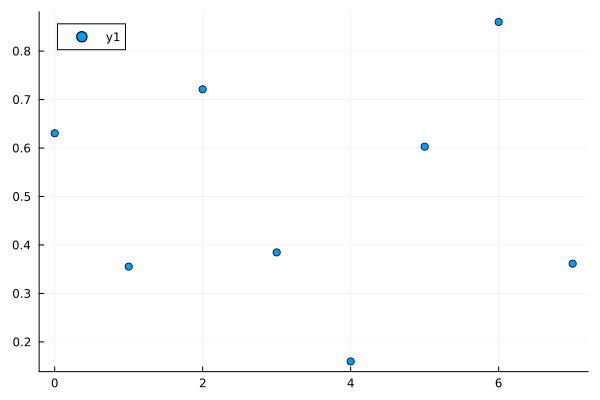

In [54]:



using Plots
x = rand(n,1)
scatter(0:(n-1),x)


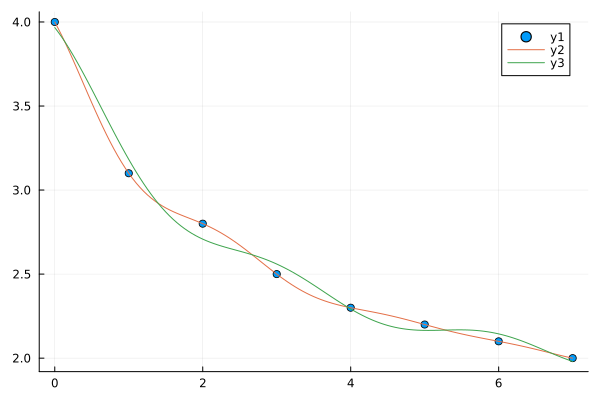

In [55]:

using Plots

y= C*Y
t_range = 0:.05:(n-1)
scatter(0:(n-1),Y)
P = [cbf(n,k,t) for k=0:(n-1), t in t_range]
z = P'*y

plot!(t_range,z)
z2 = P[1:6,:]'*y[1:6]

plot!(t_range,z2)


In [1]:
using Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")
Pkg.add("ImageMagick")
Pkg.add("ImageView")

   Resolving package versions...
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Worlds Best\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\W

In [11]:
using Images, TestImages, ImageView, LinearAlgebra

img=testimage("cameraman")

A=channelview(img) #image to matrix
n,m=size(A)
O=ones(n,m)

B=255*A-127*O

l=6
C=dctcomp(B,l)
D=(C+127*O)/255

img2=colorview(Gray,D) #matrix to image

E=abs.(A-D) #error matrix
img3=colorview(Gray,E)

mosaicview(img, img2, img3, nrow=1)



LoadError: UndefVarError: `dctcomp` not defined

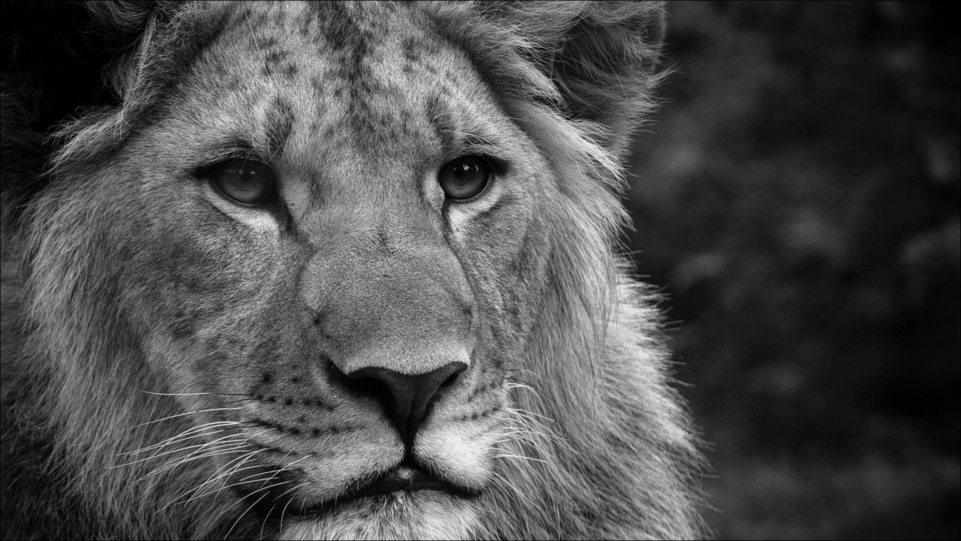

In [21]:
img4=load("lion.jpg")
img2 = Gray.(img4)

In [20]:
function cbf(n,k,t)
  if k==0
    return 1/sqrt(n)
  else
    return sqrt(2/n)*cos(k*(2t+1)*pi/(2n))
  end
end

function dctcomp(B,l)
  m,n=size(B)
  a=Int(floor(m/8))
  b=Int(floor(n/8))
  
  C=[cbf(8,i,j) for i=0:7, j=0:7]
  
  Mask=[i+j<l for i=1:8, j=1:8]
  
  M=zeros(m,n)
  for i=1:a, j=1:b
    rows=(8i-7):8i
    cols=(8j-7):8j
    X=B[rows,cols]
    Y=C*X*C'
    Y2=Y.*Mask
    X2=C'*Y2*C
    M[rows,cols]=X2
  end
  
    println("Space saved: ", 100(1-sum(Mask)/64), "%")
    println("Average error: ", norm(B-M)/(m*n))
  
  return M
  

  
end


dctcomp (generic function with 1 method)

Space saved: 95.3125%
Average error: 2.0690690431278628e-17


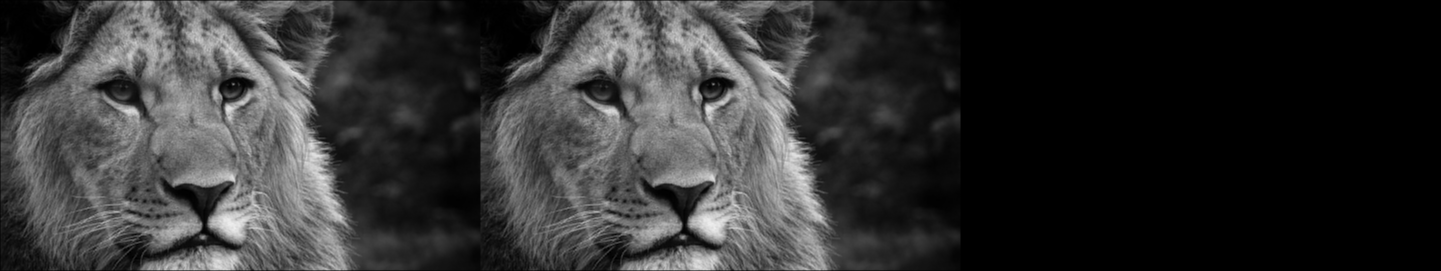

In [30]:
A=channelview(img2) #image to matrix
n,m=size(A)
O=ones(n,m)

B=255*A-127*O

l=4
C=dctcomp(B,4)
D=(C+127*O)/255

img5=colorview(Gray,D) #matrix to image

E=abs.(A-D) #error matrix
img3=colorview(Gray,E)

mosaicview(img2, img5, img3, nrow=1)


In [32]:
U,S,V=svd(A)
sigma=diagm(S)

A30=U[:,1:30]*sigma[1:30,1:30]*V[:,1:30]'

1080×1920 Matrix{Float64}:
 -0.00258202  -0.00243304  -0.00215778  …   0.0189081    0.0192324
 -0.00324215  -0.00308713  -0.00280068      0.018654     0.018976
 -0.00446193  -0.00429572  -0.0039886       0.0181845    0.018502
 -0.00605564  -0.00587482  -0.0055407       0.0175712    0.0178828
 -0.00778067  -0.00758403  -0.00722068      0.0169072    0.0172125
 -0.00937438  -0.00916313  -0.00877278  …   0.0162939    0.0165933
 -0.0105942   -0.0103717   -0.00996071      0.0158244    0.0161193
 -0.0112543   -0.0110258   -0.0106036       0.0155704    0.0158628
 -0.011998    -0.0111968   -0.00971653     -0.00424041  -0.00415997
 -0.0110946   -0.010341    -0.00894845     -0.00393591  -0.00385518
 -0.00942551  -0.00875963  -0.00752923  …  -0.00337328  -0.00329201
 -0.00724468  -0.00669346  -0.00567492     -0.00263817  -0.00255619
 -0.00488417  -0.00445705  -0.00366784     -0.00184248  -0.00175974
  ⋮                                     ⋱               
  0.0824952    0.0812914    0.079067      

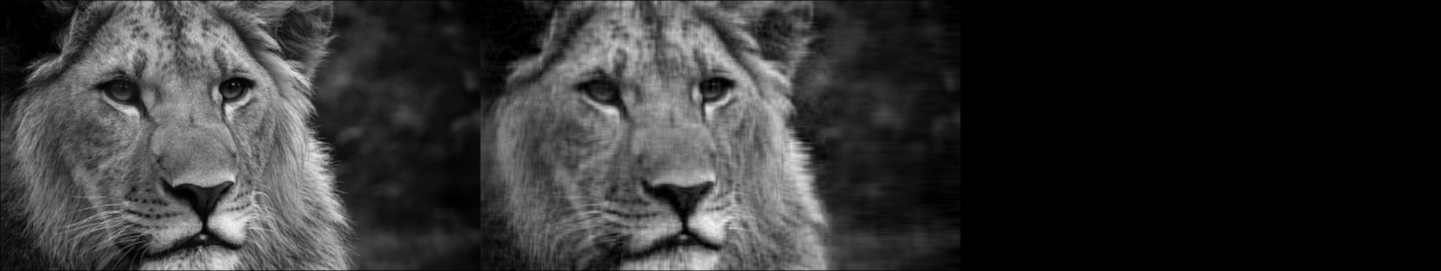

In [33]:
newimage=colorview(Gray,A30) #matrix to image

E=abs.(A-D) #error matrix
img3=colorview(Gray,E)

mosaicview(img2, newimage, img3, nrow=1)
